In [36]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import decode_predictions
from keras.models import Model
import itertools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
#To create variables for which the the paths to the train, valid, and test data directories are assigned.

train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

In [72]:
# To use the Keras ImageDataGenerator class to create batches of data from the train, valid, and test directories.

train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway'], batch_size=1)


valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway'], batch_size=1)


test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway'], batch_size=1)




Found 7500 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.
Found 1500 images belonging to 15 classes.


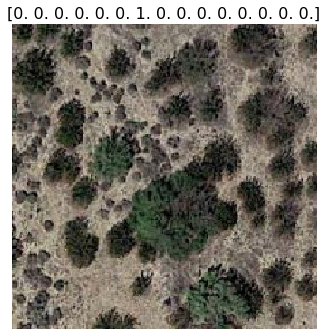

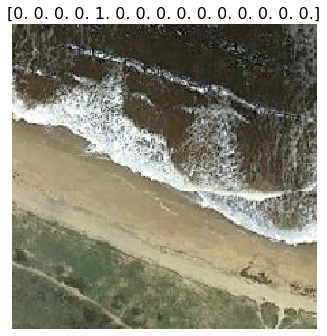

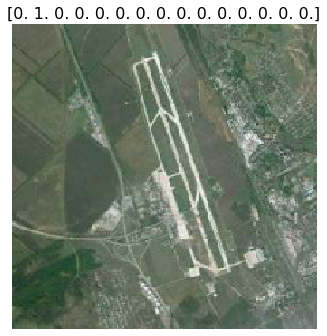

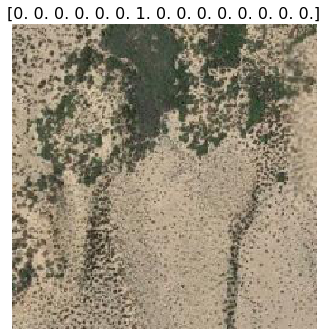

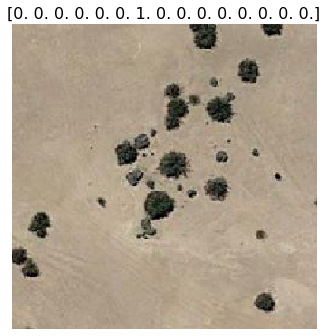

In [73]:
# To plot first 5 images in the training dataset alongside with their label
def get5Images(selected_image, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(selected_image[0]) is np.ndarray:
        selected_image = np.array(selected_image).astype(np.uint8)
        if (selected_image.shape[-1] != 3):
            selected_image = selected_image.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(selected_image)//rows if len(selected_image) % 2 == 0 else len(selected_image)//rows + 1
    for i in range(len(selected_image)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(selected_image[i], interpolation=None if interp else 'none')
for idx in range(0,5):
    image, label = train_batches[idx]
    get5Images(image, titles=label)

In [75]:
#to set up vgg16 model, I am going to define 3 models for each layer
# load fc2 model
model_fc2 = VGG16()
# remove the output layer
model_fc2.layers.pop()
model_fc2 = Model(inputs=model_fc2.inputs, outputs=model_fc2.layers[-1].output)
model_fc2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [74]:
#to set up vgg16 model, I am going to define 3 models for each layer
# load fc2 model
model_fc1 = VGG16()
# remove the output layer
model_fc1.layers.pop()
model_fc1.layers.pop()
model_fc1 = Model(inputs=model_fc1.inputs, outputs=model_fc1.layers[-1].output)
model_fc1.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [84]:
#To get traning featurs for fc2 model
from pickle import dump
Fc2_X_train_feature_list = []
Fc2_y_train_feature_list = []

for idx in range(0,3000):

    image, label = train_batches[idx]
    img = image[0]
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    features = model_fc2.predict(img)

    Fc2_X_train_feature_list.append(features)
    Fc2_y_train_feature_list.append(label)
print(len(Fc2_X_train_feature_list))
print(len(Fc2_y_train_feature_list))

#To save output into pickle file to use it later
dump(Fc2_X_train_feature_list, open('fc2_model/Fc2_X_train_feature_list.pkl', 'wb'))
dump(Fc2_y_train_feature_list, open('fc2_model/Fc2_y_train_feature_list.pkl', 'wb'))


5
5


In [86]:
#To get valid featurs for fc2 model

from pickle import dump
Fc2_X_valid_feature_list = []
Fc2_y_vallid_feature_list = []

for idx in range(0,700):

    image, label = valid_batches[idx]
    img = image[0]
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    features = model_fc2.predict(img)

    Fc2_X_valid_feature_list.append(features)
    Fc2_y_vallid_feature_list.append(label)
print(len(Fc2_X_valid_feature_list))
print(len(Fc2_y_vallid_feature_list))
#To save output into pickle file to use it later
dump(Fc2_X_valid_feature_list, open('fc2_model/Fc2_X_valid_feature_list.pkl', 'wb'))
dump(Fc2_y_vallid_feature_list, open('fc2_model/Fc2_y_vallid_feature_list.pkl', 'wb'))

AttributeError: 'list' object has no attribute 'head'

In [ ]:
#To get test featurs for fc2 model

from pickle import dump
Fc2_X_test_feature_list = []
Fc2_y_test_feature_list = []

for idx in range(0,700):

    image, label = test_batches[idx]
    img = image[0]
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    features = model_fc2.predict(img)

    Fc2_X_test_feature_list.append(features)
    Fc2_y_test_feature_list.append(label)
print(len(Fc2_X_test_feature_list))
print(len(Fc2_y_test_feature_list))
#To save output into pickle file to use it later
dump(Fc2_X_test_feature_list, open('fc2_model/Fc2_X_test_feature_list.pkl', 'wb'))
dump(Fc2_y_test_feature_list, open('fc2_model/Fc2_y_test_feature_list.pkl', 'wb'))